<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Valeria Ladrón de Guevara Vidrio y Martha Mariela López Molina.

**Fecha:** 24 de junio del 2021.

**Expediente** : if714513 y if721862.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/valerialadron/Proyecto_VLadron_MMLopez

# Proyecto TEMA-2


<img src="covid.jpg">


___
## 1. Entregable.


### 1.1 COVID-19
> En este proyecto se busca simular el comportamiento de Covid-19 en Estados Unidos a partir de la implementación de las vacunas.

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
> Simular el comportamiento del COVID-19 utilizando los datos de Estados Unidos , para observar el impacto que ha tenido la aplicación de la vacuna.
> #### 1.2 Objetivos específicos
1. Se comparará año 2020 y 2021 para observar impacto de vacunas estimando: 
* Número de muertes 
* Número de casos
* Total de personas hospitalizadas



### 1.3 Definición del problema.
> La COVID-19 es la enfermedad causada por el nuevo coronavirus conocido como SARS-CoV-2. La OMS tuvo noticia por primera vez de la existencia de este nuevo virus el 31 de diciembre de 2019, al ser informada de un grupo de casos de «neumonía vírica» que se habían declarado en Wuhan (República Popular China). La única solución a esta enfermedad sería la creación de una nueva vacuna.

> Para 18 de febrero de este año, había al menos siete vacunas distintas que los países empezaron a administrar, dando  prioridad a las personas vulnerables.
Además de que había más de 200 vacunas experimentales en desarrollo, de las cuales más de 60 estaban en fase clínica. 

> La OMS ha recalcado que estar vacunados no significa tirar por la borda las medidas preventivas y arriesgar nuestra salud y la de los demás, sobre todo porque todavía desconocemos el grado en que las vacunas protegen no solo contra la enfermedad sino también contra la infección y la transmisión.

> De igual manera, ha comentado que la mayoría de los científicos prevén que las vacunas que se desarrollen contra la COVID-19 no tendrán una eficacia del 100%. Pero se trabaja para asegurar que toda vacuna aprobada tenga la máxima eficacia posible, de modo que consiga el mayor efecto en la pandemia.

> Es por eso que nos preguntamos "¿Qué impacto han tenido las vacunas hasta el día de hoy? ¿Qué efectividad han tenido?", siendo esas preguntas las bases del desarrollo de este proyecto.

### 1.4 Nodos y variables que se decidieron simular y porqué
* Número de muertes por dia 
* Personas vacunadas por dia
* Personas hospitalizadas por dia
* Total de casos por dia

### 1.5 Definición de hipótesis y supuestos.
**Hipótesis**

* Entre más vacunas aplicadas existan, menor serán total de muertes.
* EUA tendrá menor cantidad de casos por día por las vacunas aplicadas.

**Supuestos**





### 1.6 Obtención de bases de datos
https://ourworldindata.org/coronavirus





<img src="diagrama.jpg">

In [249]:
#Paqueterias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import loglaplace 
from scipy.stats.distributions import norm
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib
from collections import defaultdict
from time import time
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from IPython.display import Markdown as md
from scipy.stats import cosine
from scipy.stats import logistic
from scipy.stats import dweibull
from scipy.stats import ncf
%matplotlib inline
import os
import scipy.stats as st
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#Importando datos
covid = pd.read_csv('covid.csv', encoding="utf-8")
data = covid[covid['location'] == 'United States']
data = data.set_index(['date'])
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
22/01/2020,USA,North America,United States,1.0,NaN,NaN,0.0,NaN,NaN,0.003,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
23/01/2020,USA,North America,United States,1.0,0.0,NaN,0.0,NaN,NaN,0.003,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
24/01/2020,USA,North America,United States,2.0,1.0,NaN,0.0,NaN,NaN,0.006,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
25/01/2020,USA,North America,United States,2.0,0.0,NaN,0.0,NaN,NaN,0.006,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
26/01/2020,USA,North America,United States,5.0,3.0,NaN,0.0,NaN,NaN,0.015,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75


In [23]:
def kde_scipy_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x: kde.evaluate(x)

def kde_sklearn_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis]))
    return log_pdf

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 0.24.1
  scipy: 1.6.2
  statsmodels: 0.12.2


In [24]:
functions = dict(zip(kde_funcnames, kde_funcs))


def plot_scaling(N=1000, bandwidth=0.1, rtol=0.0,
                 Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling of KDE algorithms.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    for name in functions:
        if name not in kwds:
            kwds[name] = {}
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        kwds['Scikit-learn']['rtol'] = rtol_i
        for name, func in functions.items():
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                func(x, xgrid, bw_i, **kwds[name])
                t1 = time()
                t += (t1 - t0)
            times[name].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for name in kde_funcnames:
            ax.loglog(N, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for name in kde_funcnames:
            ax.loglog(bandwidth, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for name in kde_funcnames:
            ax.loglog(rtol, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_scaling_vs_kernel(kernels, N=1000, bandwidth=0.1, rtol=0.0,
                           Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling for Scikit-learn kernels.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        for kernel in kernels:
            kwds['kernel'] = kernel
            kwds['rtol'] = rtol_i
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                kde_sklearn(x, xgrid, bw_i, **kwds)
                t1 = time()
                t += (t1 - t0)
            times[kernel].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for kernel in kernels:
            ax.loglog(N, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for kernel in kernels:
            ax.loglog(bandwidth, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for kernel in kernels:
            ax.loglog(rtol, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()
    
    
    
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    
# Definimos la función para que nos diga el porcentaje de aceptadas en ambos casos
def histograma(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    barras = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.hist(barras,50,density=True)
    plt.xlabel('valores aleatorios')
    plt.ylabel('probabilidad')
    plt.title('histograma función creada')
    plt.show()
    return




In [25]:
functions = dict(zip(kde_funcnames, kde_funcs))


def plot_scaling(N=1000, bandwidth=0.1, rtol=0.0,
                 Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling of KDE algorithms.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    for name in functions:
        if name not in kwds:
            kwds[name] = {}
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        kwds['Scikit-learn']['rtol'] = rtol_i
        for name, func in functions.items():
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                func(x, xgrid, bw_i, **kwds[name])
                t1 = time()
                t += (t1 - t0)
            times[name].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for name in kde_funcnames:
            ax.loglog(N, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for name in kde_funcnames:
            ax.loglog(bandwidth, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for name in kde_funcnames:
            ax.loglog(rtol, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_scaling_vs_kernel(kernels, N=1000, bandwidth=0.1, rtol=0.0,
                           Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling for Scikit-learn kernels.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        for kernel in kernels:
            kwds['kernel'] = kernel
            kwds['rtol'] = rtol_i
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                kde_sklearn(x, xgrid, bw_i, **kwds)
                t1 = time()
                t += (t1 - t0)
            times[kernel].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for kernel in kernels:
            ax.loglog(N, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for kernel in kernels:
            ax.loglog(bandwidth, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for kernel in kernels:
            ax.loglog(rtol, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()
    
    
    
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    
# Definimos la función para que nos diga el porcentaje de aceptadas en ambos casos
def histograma(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    barras = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.hist(barras,50,density=True)
    plt.xlabel('valores aleatorios')
    plt.ylabel('probabilidad')
    plt.title('histograma función creada')
    plt.show()
    return

### Número de casos

Text(0.5, 1.0, 'Casos EUA 2020-2021')

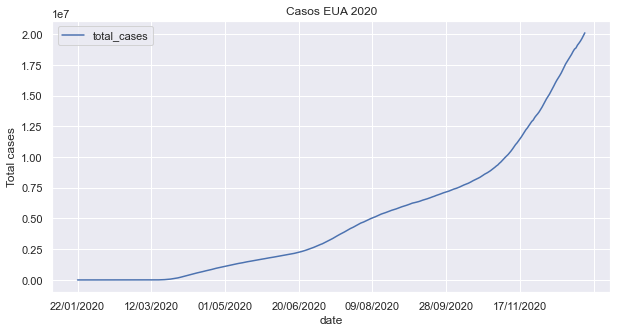

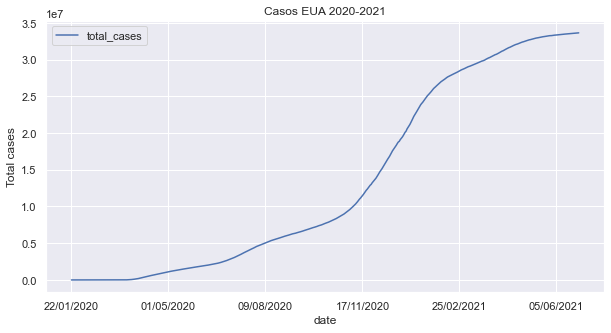

In [4]:
usa_casos = pd.DataFrame(data['total_cases'])
usa_casos_antes = usa_casos.loc['22/01/2020':'31/12/2020']

#2020
usa_casos_antes.plot(figsize=[10,5])
plt.ylabel('Total cases')
plt.title('Casos EUA 2020')
#2020-2021
usa_casos.plot(figsize=[10,5])
plt.ylabel('Total cases')
plt.title('Casos EUA 2020-2021')

(array([101.,  49.,  23.,  17.,  22.,  28.,  25.,  16.,  11.,   7.,   6.,
          7.,   6.,   5.,   5.,   5.,   6.,   6.,   5.,   4.,   5.,   6.,
          7.,   9.,  13.,  18.,  20.,  16.,  21.,  55.]),
 array([1.00000000e+00, 1.12135103e+06, 2.24270107e+06, 3.36405110e+06,
        4.48540113e+06, 5.60675117e+06, 6.72810120e+06, 7.84945123e+06,
        8.97080127e+06, 1.00921513e+07, 1.12135013e+07, 1.23348514e+07,
        1.34562014e+07, 1.45775514e+07, 1.56989015e+07, 1.68202515e+07,
        1.79416015e+07, 1.90629516e+07, 2.01843016e+07, 2.13056516e+07,
        2.24270017e+07, 2.35483517e+07, 2.46697017e+07, 2.57910518e+07,
        2.69124018e+07, 2.80337518e+07, 2.91551019e+07, 3.02764519e+07,
        3.13978019e+07, 3.25191520e+07, 3.36405020e+07]),
 <BarContainer object of 30 artists>)

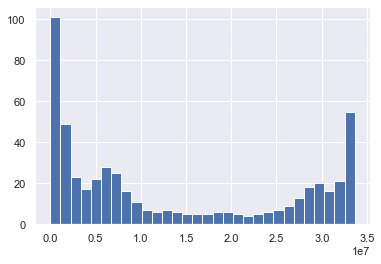

In [5]:
plt.hist(np.array(usa_casos['total_cases']), bins=30)

In [91]:
def kde_statsmodels_m(x, x_grid, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  
                          var_type='c', **kwargs)
    return lambda x: kde.pdf([x]) 

In [92]:
def kde_hist_f_m(datos:'Datos',
              bins:'Bins histograma',
              x:'Linspace'):
    '''
    Esta función nos regresa la función f obtenida por medio del KDE de Statsmodels multivariable 
    para ciertos datos. Además, permite ver el histograma de los datos junto con la función f encontrada
    en una misma gráfica.
    '''
    
    xx = x
    f = kde_statsmodels_m(datos, xx)
    
    plt.hist(datos, bins = bins, density = True)
    plt.plot(xx, f(xx), label = 'Función f')
    plt.legend(loc = 'best')
    plt.show()
    
    return f

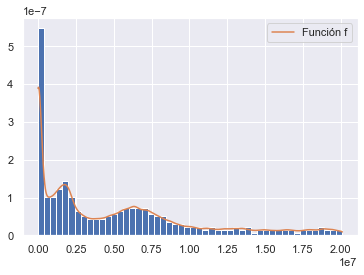

In [94]:
x11 = np.array(usa_casos_antes['total_cases'])
xc20 = np.linspace(x11.min(),x11.max(),1000)
fc20 = kde_hist_f_m(x11, 50, xc20)

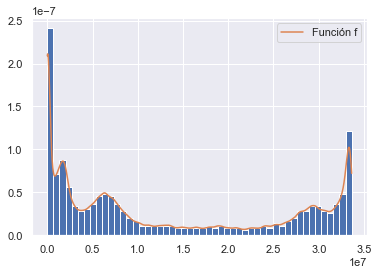

In [230]:
x12 = np.array(usa_casos['total_cases'])
xc21 = np.linspace(x12.min(),x12.max(),1000)
fc21 = kde_hist_f_m(x12, 50, xc21)

### Total de muertes

Text(0.5, 1.0, 'Muertes EUA 2020-2021')

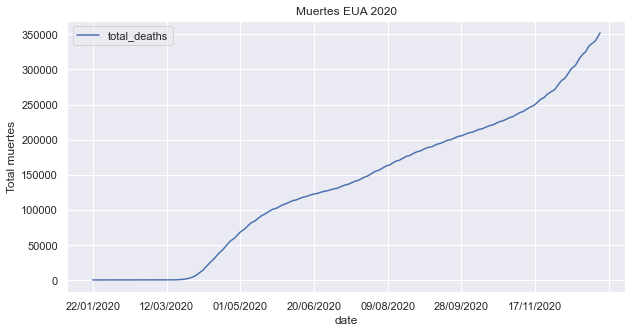

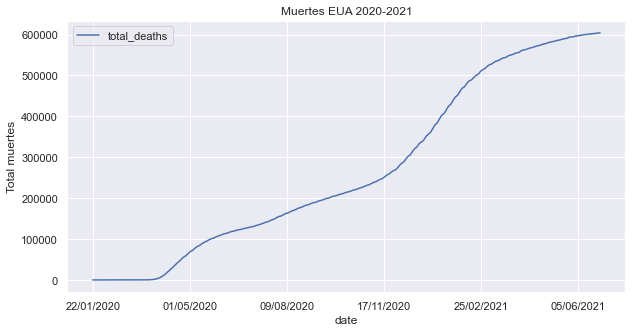

In [231]:
usa_muertes = pd.DataFrame(data['total_deaths'])
usa_muertes_antes = usa_muertes.loc['22/01/2020':'31/12/2020']

#2020
usa_muertes_antes.plot(figsize=[10,5])
plt.ylabel('Total muertes')
plt.title('Muertes EUA 2020')
#2020-2021
usa_muertes.plot(figsize=[10,5])
plt.ylabel('Total muertes')
plt.title('Muertes EUA 2020-2021')

(array([78.,  9., 10., 10., 15., 26., 31., 19., 21., 26., 27., 21., 14.,
        10.,  9.,  7.,  9.,  7.,  6.,  5.,  7.,  6.,  7.,  7., 11., 10.,
        18., 22., 29., 47.]),
 array([     0.        ,  20137.16666667,  40274.33333333,  60411.5       ,
         80548.66666667, 100685.83333333, 120823.        , 140960.16666667,
        161097.33333333, 181234.5       , 201371.66666667, 221508.83333333,
        241646.        , 261783.16666667, 281920.33333333, 302057.5       ,
        322194.66666667, 342331.83333333, 362469.        , 382606.16666667,
        402743.33333333, 422880.5       , 443017.66666667, 463154.83333333,
        483292.        , 503429.16666667, 523566.33333333, 543703.5       ,
        563840.66666667, 583977.83333333, 604115.        ]),
 <BarContainer object of 30 artists>)

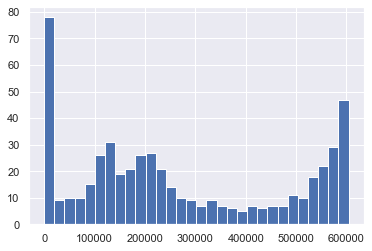

In [158]:
plt.hist(np.array(usa_muertes['total_deaths']), bins=30)

In [240]:
usa0 = usa_muertes[usa_muertes['total_deaths'] != 0]


In [243]:
M = usa_muertes.groupby(['date']).mean()
prom_TM = M['total_deaths']
prom_TM.head(10)

date
01/01/2021    354366.0
01/02/2020         0.0
01/02/2021    451496.0
01/03/2020         1.0
01/03/2021    516563.0
01/04/2020      6655.0
01/04/2021    553618.0
01/05/2020     68208.0
01/05/2021    577047.0
01/06/2020    108643.0
Name: total_deaths, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

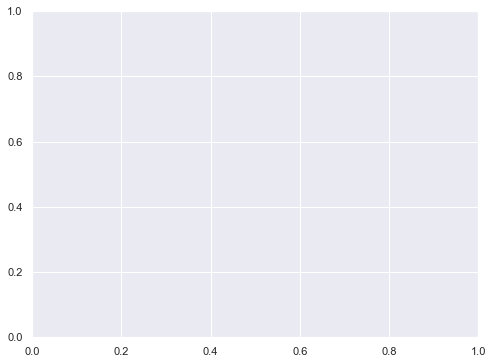

In [260]:
x_grid = np.linspace(-2, 6, 1000)
x = prom_TM

fig, ax = plt.subplots(figsize=(8,6))
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(-2, 6)
ax.legend(loc='upper right')

{'bandwidth': 1.0}


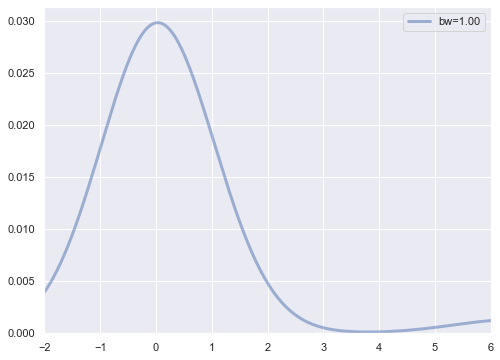

In [261]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=30) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper right')
ax.set_xlim(-2, 6);

In [262]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

El máximo de f es: 0.029854481126675082


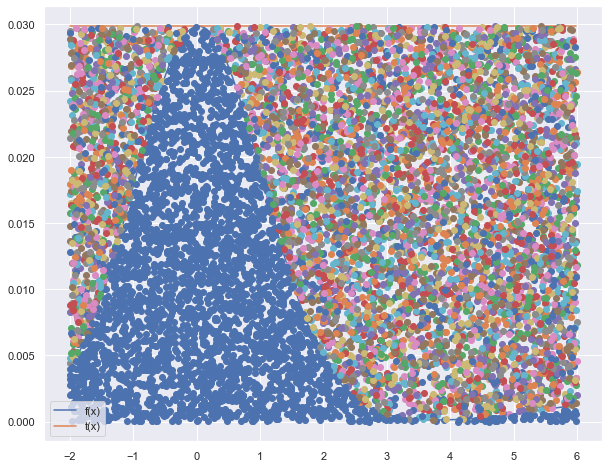

In [263]:
# Función objetivo 
x_grid = np.linspace(-2, 6, 1000)
data1 = np.asarray(prom_TM)
f = kde_sklearn(data1, x_grid, bandwidth=1)
# Máximo de la función f
max_f = max(f(x))
# Función t
t = lambda x: max_f*np.ones(len(x))
x = np.arange(-2,6,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.uniform(-2,6,N)
Acep_rechazo(R2,R1,f,t)

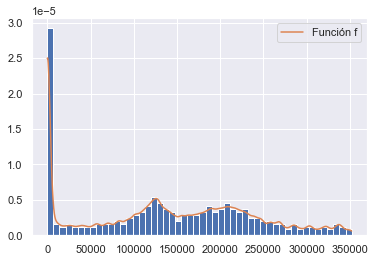

In [123]:
x21 = np.array(usa_muertes_antes['total_deaths'])
xm20 = np.linspace(x21.min(),x21.max(),1000)
fm20 = kde_hist_f_m(x21, 50, xm20)

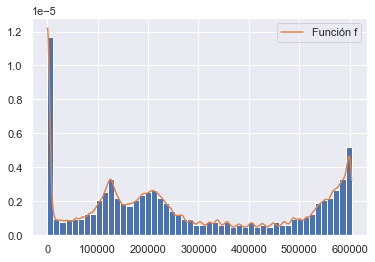

In [124]:
x22 = np.array(usa_muertes['total_deaths'])
xm21 = np.linspace(x22.min(),x22.max(),1000)
fm21 = kde_hist_f_m(x22, 50, xm21)

### Pacientes hospitalizados

Text(0.5, 1.0, 'Pacientes hospitalizados EUA 2020-2021')

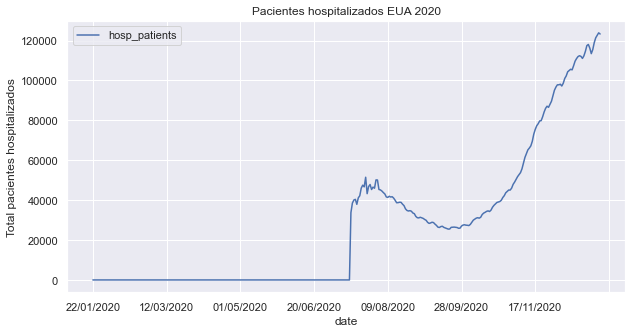

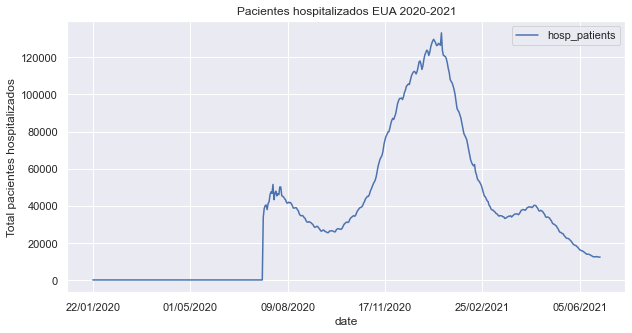

In [250]:
usa_hosp = pd.DataFrame(data['hosp_patients'])
usa_hosp_antes = usa_hosp.loc['22/01/2020':'31/12/2020']

#2020
usa_hosp_antes.plot(figsize=[10,5])
plt.ylabel('Total pacientes hospitalizados')
plt.title('Pacientes hospitalizados EUA 2020')
#2020-2021
usa_hosp.plot(figsize=[10,5])
plt.ylabel('Total pacientes hospitalizados')
plt.title('Pacientes hospitalizados EUA 2020-2021')

In [256]:
hosp0 = usa_hosp[usa_hosp['hosp_patients'] != 0]


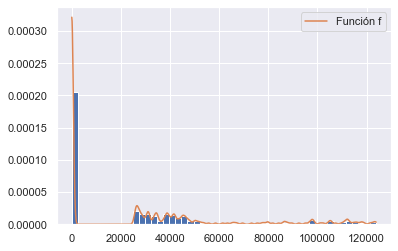

In [257]:
x31 = np.array(usa_hosp_antes['hosp_patients'])
xh20 = np.linspace(x31.min(),x31.max(),1000)
fh20 = kde_hist_f_m(x31, 50, xh20)

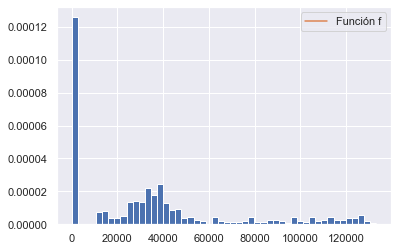

In [258]:
x32 = np.array(usa_hosp['hosp_patients'])
xh21 = np.linspace(x32.min(),x32.max(),1000)
fh21 = kde_hist_f_m(x32, 50, xh21)

### Total vacunados

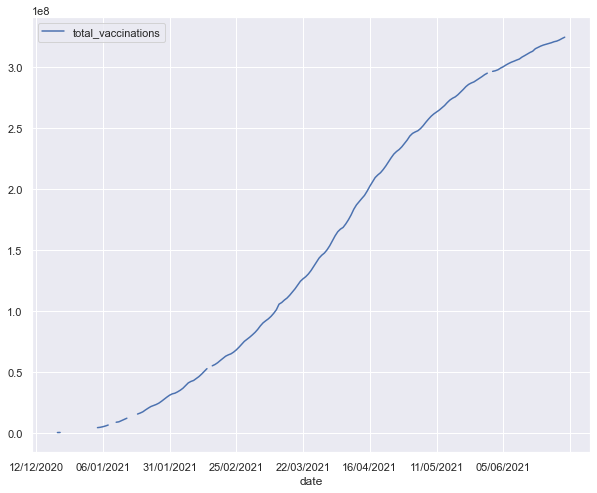

In [51]:
usa_vac = pd.DataFrame(data['total_vaccinations'])
usa_vac.plot(figsize=[10,8])

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>